<a href="https://colab.research.google.com/github/newReena2001/jenkins/blob/main/COTTON_DISEASE_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing the libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

**Importing the datasets from kaggle**

In [ ]:
!pip install kaggle

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files

In [ ]:
uploaded=files.upload()

Saving kaggle (1).json to kaggle (1).json


In [ ]:
!mkdir ~/.kaggle

In [ ]:
!ls ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
! kaggle datasets download -d seroshkarim/cotton-leaf-disease-dataset

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 403, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
!unzip /content/cotton-leaf-disease-dataset.zip

unzip:  cannot find or open /content/cotton-leaf-disease-dataset.zip, /content/cotton-leaf-disease-dataset.zip.zip or /content/cotton-leaf-disease-dataset.zip.ZIP.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [ ]:
# Define the dataset directory
dataset_directory = '/content/cotton'

In [ ]:
# Create an ImageDataGenerator for data augmentation and preprocessing
datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

In [ ]:
# Load and preprocess the training dataset
train_generator = datagen.flow_from_directory(
    dataset_directory,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

Found 1369 images belonging to 4 classes.


In [ ]:
# Load and preprocess the validation dataset
validation_generator = datagen.flow_from_directory(
    dataset_directory,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 340 images belonging to 4 classes.


**Build a Convolutional Neural Network (CNN)**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')  # Adjust the number of output classes as needed
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)       0

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

In [ ]:
# Define the dataset directory
dataset_directory = '/content/cotton'

In [ ]:
# List the subdirectories (classes) in the dataset directory
classes = os.listdir('/content/cotton')

In [ ]:
# Display a few sample images from each class
num_samples_per_class = 3

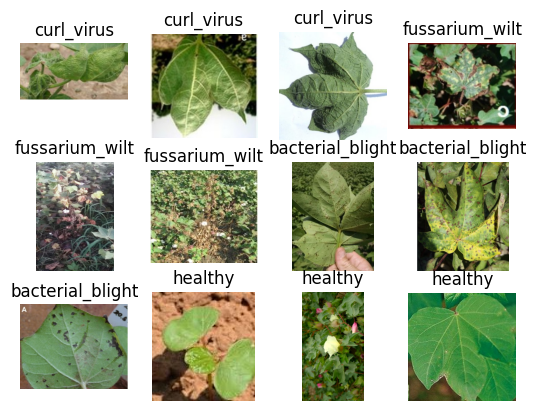

In [ ]:
for class_name in classes:
    class_directory = os.path.join(dataset_directory, class_name)
    image_files = os.listdir(class_directory)

    # Display a few sample images from each class
    for i, image_file in enumerate(image_files[:num_samples_per_class]):
        image_path = os.path.join(class_directory, image_file)
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB
        plt.subplot(num_samples_per_class, len(classes), i + 1 + classes.index(class_name) * num_samples_per_class)
        plt.imshow(image)
        plt.title(class_name)
        plt.axis('off')

plt.show()

**Train the model**

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,
    validation_data=validation_generator,
    validation_steps=len(validation_generator)
)

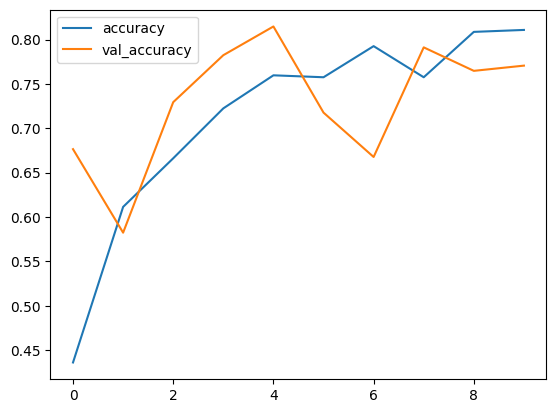

In [ ]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()

**Evaluate the Model**

In [ ]:
# Evaluate the model on the validation dataset
evaluation = model.evaluate(validation_generator)
print("Validation Loss:", evaluation[0])
print("Validation Accuracy:", evaluation[1])

11/11 [==============================] - 4s 379ms/step - loss: 0.5318 - accuracy: 0.8059
Validation Loss: 0.5318456292152405
Validation Accuracy: 0.8058823347091675


**Define a function to load and preprocess an image**

**Curl virus**

In [ ]:
# Define a function to load and preprocess an image
def load_and_preprocess_image(image_path):
    # Load the image using OpenCV
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB
    img = cv2.resize(img, (224, 224))  # Resize the image to match the model's input size
    img = img / 255.0  # Normalize pixel values to [0, 1]
    return img

In [ ]:
# Replace 'new_image_path' with the path to the new image you want to classify
new_image_path = '/content/cotton/curl_virus/Curl179.png'
img = load_and_preprocess_image(new_image_path)
img = np.expand_dims(img, axis=0)

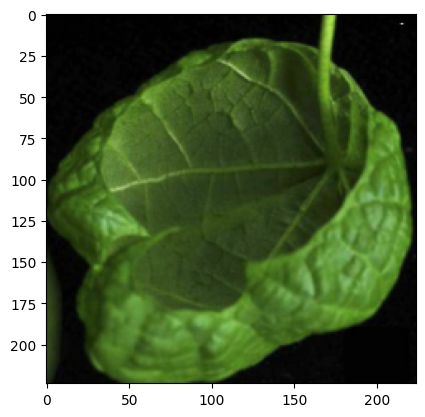

In [ ]:
plt.imshow(img[0])

In [ ]:
# Make predictions using the model
predictions = model.predict(img)

1/1 [==============================] - 0s 244ms/step


In [ ]:
# Get the class with the highest probability
predicted_class_index = np.argmax(predictions)
class_labels = train_generator.class_indices
class_labels = dict((v, k) for k, v in class_labels.items())
predicted_class_label = class_labels[predicted_class_index]

print("Predicted Class:", predicted_class_label)
print("Predicted Probabilities:", predictions)

Predicted Class: curl_virus
Predicted Probabilities: [[1.9288497e-01 5.6763911e-01 3.8842729e-04 2.3908752e-01]]


**Healthy**

In [ ]:
# Define a function to load and preprocess an image
def load_and_preprocess_image(image_path):
    # Load the image using OpenCV
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB
    img = cv2.resize(img, (224, 224))  # Resize the image to match the model's input size
    img = img / 255.0  # Normalize pixel values to [0, 1]
    return img

In [ ]:
# Replace 'new_image_path' with the path to the new image you want to classify
new_image_path = '/content/cotton/healthy/h106.jpg'
img = load_and_preprocess_image(new_image_path)
img = np.expand_dims(img, axis=0)

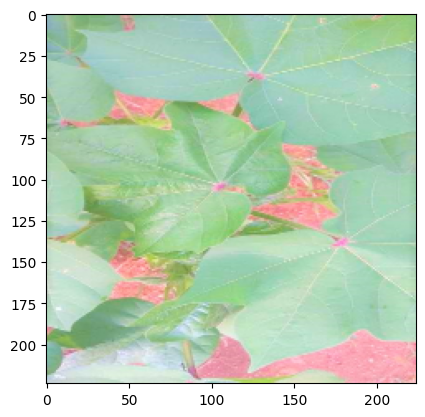

In [ ]:
plt.imshow(img[0])

In [ ]:
# Make predictions using the model
predictions = model.predict(img)

1/1 [==============================] - 0s 20ms/step


In [ ]:
# Get the class with the highest probability
predicted_class_index = np.argmax(predictions)
class_labels = train_generator.class_indices
class_labels = dict((v, k) for k, v in class_labels.items())
predicted_class_label = class_labels[predicted_class_index]

print("Predicted Class:", predicted_class_label)
print("Predicted Probabilities:", predictions)

Predicted Class: healthy
Predicted Probabilities: [[2.3698422e-01 5.2778456e-02 5.6187215e-04 7.0967537e-01]]


**bacterial blight**

In [ ]:
# Define a function to load and preprocess an image
def load_and_preprocess_image(image_path):
    # Load the image using OpenCV
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB
    img = cv2.resize(img, (224, 224))  # Resize the image to match the model's input size
    img = img / 255.0  # Normalize pixel values to [0, 1]
    return img

In [ ]:
# Replace 'new_image_path' with the path to the new image you want to classify
new_image_path = '/content/cotton/bacterial_blight/bact106.jpg'
img = load_and_preprocess_image(new_image_path)
img = np.expand_dims(img, axis=0)

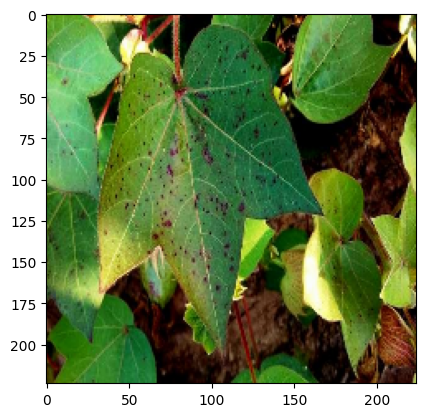

In [ ]:
plt.imshow(img[0])

In [ ]:
# Make predictions using the model
predictions = model.predict(img)

1/1 [==============================] - 0s 19ms/step


In [ ]:
# Get the class with the highest probability
predicted_class_index = np.argmax(predictions)
class_labels = train_generator.class_indices
class_labels = dict((v, k) for k, v in class_labels.items())
predicted_class_label = class_labels[predicted_class_index]

print("Predicted Class:", predicted_class_label)
print("Predicted Probabilities:", predictions)

Predicted Class: bacterial_blight
Predicted Probabilities: [[0.9424404  0.00262294 0.0539746  0.00096209]]


**fussarium wilt**

In [ ]:
# Define a function to load and preprocess an image
def load_and_preprocess_image(image_path):
    # Load the image using OpenCV
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB
    img = cv2.resize(img, (224, 224))  # Resize the image to match the model's input size
    img = img / 255.0  # Normalize pixel values to [0, 1]
    return img

In [ ]:
# Replace 'new_image_path' with the path to the new image you want to classify
new_image_path = '/content/cotton/fussarium_wilt/fus106.jpg'
img = load_and_preprocess_image(new_image_path)
img = np.expand_dims(img, axis=0)

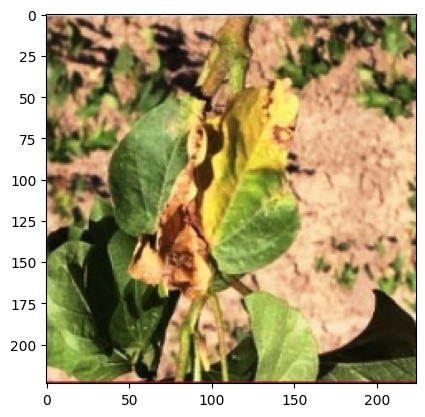

In [ ]:
plt.imshow(img[0])

In [ ]:
# Make predictions using the model
predictions = model.predict(img)

1/1 [==============================] - 0s 29ms/step


In [ ]:
# Get the class with the highest probability
predicted_class_index = np.argmax(predictions)
class_labels = train_generator.class_indices
class_labels = dict((v, k) for k, v in class_labels.items())
predicted_class_label = class_labels[predicted_class_index]

print("Predicted Class:", predicted_class_label)
print("Predicted Probabilities:", predictions)

Predicted Class: fussarium_wilt
Predicted Probabilities: [[9.777731e-04 7.984568e-06 9.990068e-01 7.449260e-06]]


**ResNet-50**

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Input, Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Define the dataset directory
dataset_directory = '/content/cotton'

In [ ]:
# Create an ImageDataGenerator for data augmentation and preprocessing
datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

In [ ]:
# Load and preprocess the dataset
input_shape = (224, 224, 3)
batch_size = 32
train_generator = datagen.flow_from_directory(
    dataset_directory,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)
validation_generator = datagen.flow_from_directory(
    dataset_directory,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 1369 images belonging to 4 classes.
Found 340 images belonging to 4 classes.


In [ ]:
# Load the pre-trained ResNet-50 model (without top layers)
base_model = ResNet50(weights='imagenet', include_top=False, input_tensor=Input(shape=input_shape))

94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
# Add custom classification layers on top
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(128, activation='relu')(x)
x = Dense(4, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=x)

In [ ]:
# Compile the model
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                          

In [ ]:
# Train the model
history_resnet50 = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,
    validation_data=validation_generator,
    validation_steps=len(validation_generator)
)

Epoch 1/10


In [ ]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()

**VGG16**

In [ ]:
from tensorflow.keras.applications import VGG16

In [ ]:
# Load the pre-trained VGG16 model (without top layers)
base_model = VGG16(weights='imagenet', include_top=False, input_tensor=Input(shape=input_shape))

In [ ]:
IMAGE_SIZE = [224, 224] # VGG excepts the image size 224, 224

In [ ]:
# Add custom classification layers on top
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(128, activation='relu')(x)
x = Dense(4, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=x)

In [ ]:
# Compile the model
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:
# Train the model
history_resnet50 = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,
    validation_data=validation_generator,
    validation_steps=len(validation_generator)
)

In [ ]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()

In [ ]:
from IPython import display
display.set_matplotlib_formats('svg')

plt.style.use('seaborn-pastel')
plt.plot(r.history['loss'], label='train loss')
plt.legend()
plt.show()
plt.savefig('val_acurracy')

# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.legend()
plt.show()
plt.savefig('val_accuracy')
plt.tight_layout()

**Inception**

In [ ]:
from tensorflow.keras.applications import InceptionV3

In [ ]:
# Load the pre-trained InceptionV3 model (without top layers)
base_model = InceptionV3(weights='imagenet', include_top=False, input_tensor=Input(shape=input_shape))

In [ ]:
# Add custom classification layers on top
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(128, activation='relu')(x)
x = Dense(4, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=x)

In [ ]:
# Compile the model
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
history_resnet50 = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,
    validation_data=validation_generator,
    validation_steps=len(validation_generator)
)

In [ ]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()

**Mobile Net**

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.layers import Input, Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Define the dataset directory
dataset_directory = '/content/cotton'

In [ ]:
# Create an ImageDataGenerator for data augmentation and preprocessing
datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

In [ ]:
# Load and preprocess the dataset
input_shape = (224, 224, 3)
batch_size = 32
train_generator = datagen.flow_from_directory(
    dataset_directory,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)
validation_generator = datagen.flow_from_directory(
    dataset_directory,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

In [ ]:
# Load the pre-trained ResNet-50 model (without top layers)
base_model = MobileNet(weights='imagenet', include_top=False, input_tensor=Input(shape=input_shape))

In [ ]:
# Add custom classification layers on top
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(128, activation='relu')(x)
x = Dense(4, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=x)

In [ ]:
# Compile the model
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:
# Train the model
history_mobilenet = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,
    validation_data=validation_generator,
    validation_steps=len(validation_generator)
)

In [ ]:
# Evaluate the model on the validation dataset
evaluation = model.evaluate(validation_generator)
print("Validation Loss:", evaluation[0])
print("Validation Accuracy:", evaluation[1])

In [ ]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()

**Validation Accuracy**

In [ ]:
import plotly.express as px

model_names=['CNN','ResNet-50','VGG16','Inception','MobileNet']
accuracy_score=[0.8176,0.8029,0.7941,0.7911,0.7823]


fig = px.bar(x=model_names, y=accuracy_score, text=np.round(accuracy_score, 2), title='Model Accuracy Comparison')
fig.update_traces(texttemplate='%{text}', textposition='outside')
fig.update_layout(xaxis_title='Models', yaxis_title='Accuracy', yaxis_tickformat='%')
fig.show()